In [1]:
# Sets project folder as working directory ('.../My Drive/Colab Notebooks/cifar10_classification_autoencoder)
import sys
from google.colab import drive
drive.mount('/content/gdrive')
%cd /content/gdrive/My\ Drive/Colab \Notebooks/cifar10_classification_autoencoder
!pwd
sys.path.append('/content/gdrive/My Drive/Colab Notebooks/cifar10_classification_autoencoder/cifar10_modules/')
!pip install matplotlib==3.1.0

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive
/content/gdrive/My Drive/Colab Notebooks/cifar10_classification_autoencoder
/content/gdrive/My Drive/Colab Notebooks/cifar10_classification_autoencoder
     |████████████████████████████████| 13.1MB 2.8MB/s 
ERROR: albumentations 0.1.12 has requirement imgaug<0.2.7,>=0.2.5, but you'll have imgaug 0.2.9 which is incompatible.
  Found existing installation: matplotlib 3.1.1
    Uninstalling matplotlib-3.1.1:
      Successfully uninstalled matplotlib-3.1.1


In [2]:
# Developed modules
from dataset import *
from modelling5 import *

Using TensorFlow backend.


In [0]:
# Suppress tensorflow warnings
import os
os.environ['TF_CPP_MIN_LOG_LEVEL']='3'

In [0]:
set_random_seeds(42)

In [0]:
classifier_config= {'batch_size': 32,
                    'callbacks': False,
                    'data_augmentation': False,
                    'balance_classes_onepoch': False,
                    'batch_norm': False,
                    'dense': True,
                    'dropout': False,
                    'dropout_value': 0.2,
                    'early_stopping': False,
                    'early_stopping_delta': 0.1,
                    'early_stopping_patience': 10,
                    'epochs': 100,
                    'global_pooling': 'max',
                    'image_shape': [32, 32, 3],
                    'loss': 'categorical_crossentropy',
                    'lr': 0.001,
                    'optimizer': 'adam',
                    'class_weights': False,
                    'weighted_metrics': None}

In [0]:
save_config(classifier_config,'classifier_config_base.json')

In [7]:
x_train, x_val, x_test, y_train, y_val, y_test, class_names= load_and_norm(0.22)

170500096/170498071 [==============================] - 11s 0us/step
Normalized by the maximum value of training set
Normalized by the maximum value of training set
Normalized by the maximum value of training set
**Training data**
Number of samples: 33150
airplane : 3910
automobile : 3891
bird : 1944
cat : 3874
deer : 1981
dog : 3913
frog : 3894
horse : 3889
ship : 3905
truck : 1949

**Validation data**
Number of samples: 9350
airplane : 1090
automobile : 1109
bird : 556
cat : 1126
deer : 519
dog : 1087
frog : 1106
horse : 1111
ship : 1095
truck : 551

**Test data**
Number of samples: 10000
airplane : 1000
automobile : 1000
bird : 1000
cat : 1000
deer : 1000
dog : 1000
frog : 1000
horse : 1000
ship : 1000
truck : 1000


/usr/local/lib/python3.6/dist-packages/keras/engine/training.py:493: UserWarning: Discrepancy between trainable weights and collected trainable weights, did you set `model.trainable` without calling `model.compile` after ?
  'Discrepancy between trainable weights and collected trainable'


Train on 33150 samples, validate on 9350 samples
Epoch 1/20
33150/33150 [==============================] - 7s 208us/step - loss: 1.4382 - acc: 0.4991 - val_loss: 3.1130 - val_acc: 0.1028
Epoch 2/20
33150/33150 [==============================] - 6s 173us/step - loss: 1.1298 - acc: 0.6015 - val_loss: 4.2555 - val_acc: 0.1183
Epoch 3/20
33150/33150 [==============================] - 6s 174us/step - loss: 0.9719 - acc: 0.6595 - val_loss: 7.1464 - val_acc: 0.1163
Epoch 4/20
33150/33150 [==============================] - 6s 170us/step - loss: 0.8343 - acc: 0.7051 - val_loss: 7.9387 - val_acc: 0.1163
Epoch 5/20
33150/33150 [==============================] - 6s 170us/step - loss: 0.6988 - acc: 0.7550 - val_loss: 9.0670 - val_acc: 0.1183
Epoch 6/20
33150/33150 [==============================] - 6s 170us/step - loss: 0.5694 - acc: 0.8006 - val_loss: 10.1950 - val_acc: 0.1183
Epoch 7/20
33150/33150 [==============================] - 6s 173us/step - loss: 0.4532 - acc: 0.8427 - val_loss: 8.4783 - 

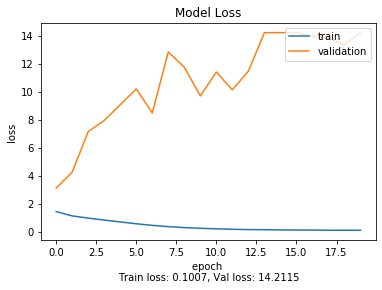

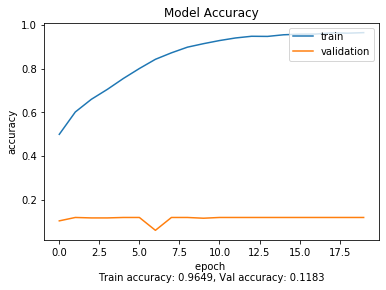

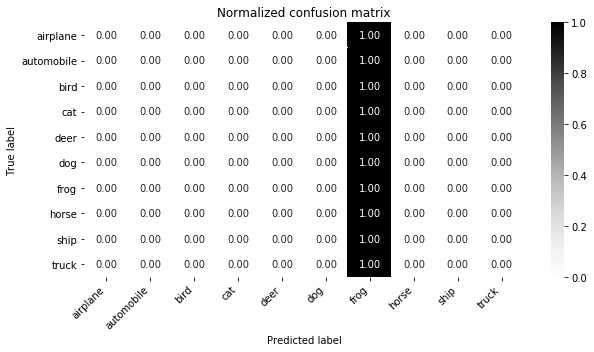


              precision    recall  f1-score   support

    airplane       0.00      0.00      0.00      1090
  automobile       0.00      0.00      0.00      1109
        bird       0.00      0.00      0.00       556
         cat       0.00      0.00      0.00      1126
        deer       0.00      0.00      0.00       519
         dog       0.00      0.00      0.00      1087
        frog       0.12      1.00      0.21      1106
       horse       0.00      0.00      0.00      1111
        ship       0.00      0.00      0.00      1095
       truck       0.00      0.00      0.00       551

    accuracy                           0.12      9350
   macro avg       0.01      0.10      0.02      9350
weighted avg       0.01      0.12      0.03      9350



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [0]:
#Classifier with randomly initialized weights

classifier_config= load_config('classifier_config_base.json')
classifier_config['epochs'] = 20
classifier_config['batch_size']= 64

classifier= load_saved_model('classifier_5m_adam_50epochs_3blocks')
reset_weights(classifier)

classifier_filename= 'classifier_5m_adam_random_weights'

history= classifier.fit(x_train,
                        y_train,
                        batch_size= classifier_config['batch_size'],
                        epochs=classifier_config['epochs'],
                        validation_data=(x_val,y_val))

plot_model_metrics(history,classifier_filename,classifier_config)
save_history(history.history, classifier_filename)
classifier.save('models/'+ classifier_filename + '.h5')
y_pred= classifier_predict_evaluate(x_val, y_val, classifier, class_names)

/usr/local/lib/python3.6/dist-packages/keras/engine/saving.py:310: UserWarning: No training configuration found in save file: the model was *not* compiled. Compile it manually.
  warnings.warn('No training configuration found in save file: '




Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 32, 32, 3)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
batch_normalization_1 (Batch (None, 32, 32, 32)        128       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
batch_normalization_2 (Batch (None, 32, 32, 32)        128       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 16, 16, 64)        18

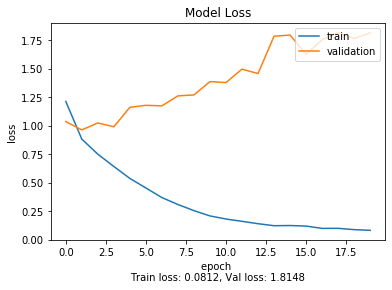

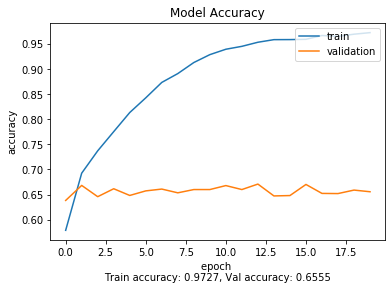

In [0]:
#1
autoencoder_config=load_config('autoencoder_config_5m_adam_50epochs_3blocks.json')
classifier_config= load_config('classifier_config_base.json')
classifier_config['epochs'] = 20
classifier_config['batch_size']= 64
classifier_config['optimizer'] = 'adam'
classifier_config['lr'] = 0.001
classifier_config['global_pooling'] = 'flatten'
classifier_config['batch_norm'] = True
encoder_filename= 'encoder_5m_adam_50epochs_3blocks'
classifier_filename= 'classifier_5m_adam_50epochs_3blocks'
classifier= train_classifier(x_train, x_val, y_train, y_val,
                             autoencoder_config, classifier_config,
                             encoder_filename, classifier_filename)

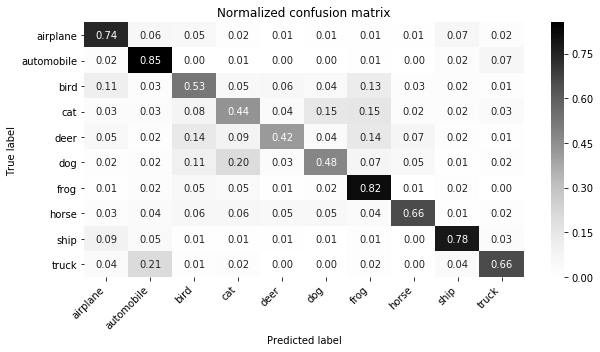


              precision    recall  f1-score   support

    airplane       0.71      0.74      0.73      1090
  automobile       0.72      0.85      0.78      1109
        bird       0.37      0.53      0.44       556
         cat       0.52      0.44      0.47      1126
        deer       0.53      0.42      0.47       519
         dog       0.63      0.48      0.54      1087
        frog       0.65      0.82      0.72      1106
       horse       0.83      0.66      0.73      1111
        ship       0.80      0.78      0.79      1095
       truck       0.62      0.66      0.64       551

    accuracy                           0.66      9350
   macro avg       0.64      0.64      0.63      9350
weighted avg       0.66      0.66      0.65      9350



In [0]:
y_pred= classifier_predict_evaluate(x_val, y_val, classifier, class_names)













Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


/usr/local/lib/python3.6/dist-packages/keras/engine/saving.py:310: UserWarning: No training configuration found in save file: the model was *not* compiled. Compile it manually.
  warnings.warn('No training configuration found in save file: '




Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 32, 32, 3)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
batch_normalization_1 (Batch (None, 32, 32, 32)        128       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
batch_normalization_2 (Batch (None, 32, 32, 32)        128       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 16, 16, 32)        0 

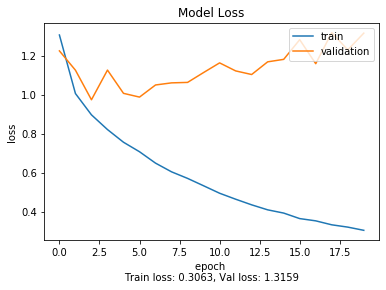

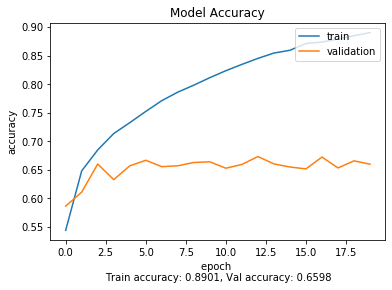

In [0]:
#2
autoencoder_config=load_config('autoencoder_config_5m_adam_50epochs_3blocks_02dropout.json')
classifier_config= load_config('classifier_config_base.json')
classifier_config['epochs'] = 20
classifier_config['batch_size']= 64
classifier_config['optimizer']= 'adam'
classifier_config['lr'] = 0.001
classifier_config['batch_norm'] = True
classifier_config['global_pooling'] = 'flatten'
encoder_filename= 'encoder_5m_adam_50epochs_3blocks_02dropout'
classifier_filename= 'classifier_5m_adam_50epochs_3blocks_02dropout'
classifier= train_classifier(x_train, x_val, y_train, y_val,
                             autoencoder_config, classifier_config,
                             encoder_filename, classifier_filename)

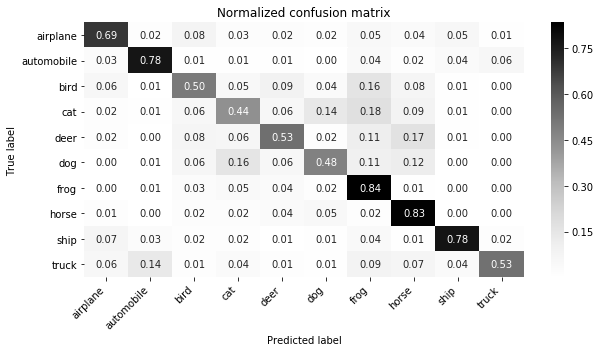


              precision    recall  f1-score   support

    airplane       0.77      0.69      0.73      1090
  automobile       0.84      0.78      0.81      1109
        bird       0.43      0.50      0.46       556
         cat       0.55      0.44      0.49      1126
        deer       0.47      0.53      0.50       519
         dog       0.63      0.48      0.55      1087
        frog       0.58      0.84      0.68      1106
       horse       0.66      0.83      0.73      1111
        ship       0.84      0.78      0.81      1095
       truck       0.74      0.53      0.62       551

    accuracy                           0.66      9350
   macro avg       0.65      0.64      0.64      9350
weighted avg       0.67      0.66      0.66      9350



In [0]:
y_pred= classifier_predict_evaluate(x_val, y_val, classifier, class_names)













Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


/usr/local/lib/python3.6/dist-packages/keras/engine/saving.py:310: UserWarning: No training configuration found in save file: the model was *not* compiled. Compile it manually.
  warnings.warn('No training configuration found in save file: '




Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 32, 32, 3)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
batch_normalization_1 (Batch (None, 32, 32, 32)        128       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
batch_normalization_2 (Batch (None, 32, 32, 32)        128       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 16, 16, 32)        0 

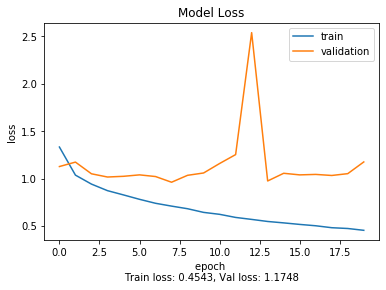

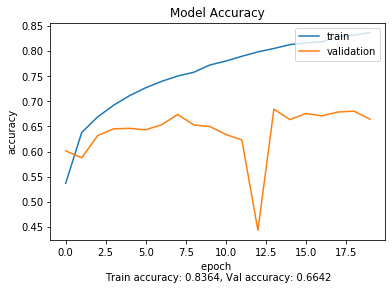

In [0]:
#2 classifier with dropout 
autoencoder_config=load_config('autoencoder_config_5m_adam_50epochs_3blocks_02dropout.json')
classifier_config= load_config('classifier_config_base.json')
classifier_config['epochs'] = 20
classifier_config['batch_size']= 64
classifier_config['optimizer']= 'adam'
classifier_config['lr'] = 0.001
classifier_config['batch_norm'] = True
classifier_config['dropout'] = True
classifier_config['dropout_value']=0.2
classifier_config['global_pooling'] = 'flatten'
encoder_filename= 'encoder_5m_adam_50epochs_3blocks_02dropout'
classifier_filename= 'classifier_02dropout_5m_adam_50epochs_3blocks_02dropout'
classifier= train_classifier(x_train, x_val, y_train, y_val,
                             autoencoder_config, classifier_config,
                             encoder_filename, classifier_filename)

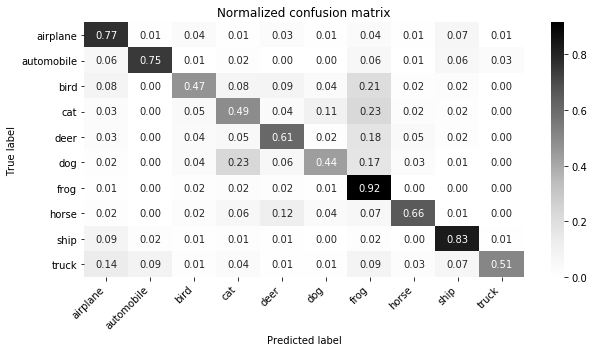


              precision    recall  f1-score   support

    airplane       0.69      0.77      0.73      1090
  automobile       0.91      0.75      0.82      1109
        bird       0.52      0.47      0.49       556
         cat       0.53      0.49      0.51      1126
        deer       0.46      0.61      0.53       519
         dog       0.67      0.44      0.53      1087
        frog       0.53      0.92      0.67      1106
       horse       0.85      0.66      0.74      1111
        ship       0.78      0.83      0.81      1095
       truck       0.81      0.51      0.63       551

    accuracy                           0.66      9350
   macro avg       0.67      0.64      0.64      9350
weighted avg       0.69      0.66      0.66      9350



In [0]:
y_pred= classifier_predict_evaluate(x_val, y_val, classifier, class_names)













Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


/usr/local/lib/python3.6/dist-packages/keras/engine/saving.py:310: UserWarning: No training configuration found in save file: the model was *not* compiled. Compile it manually.
  warnings.warn('No training configuration found in save file: '




Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 32, 32, 3)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
batch_normalization_1 (Batch (None, 32, 32, 32)        128       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
batch_normalization_2 (Batch (None, 32, 32, 32)        128       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 16, 16, 32)        0 

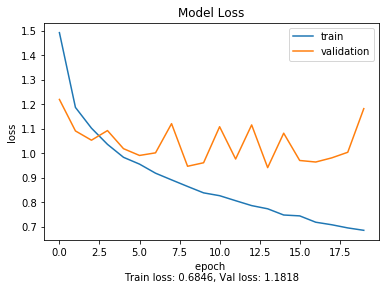

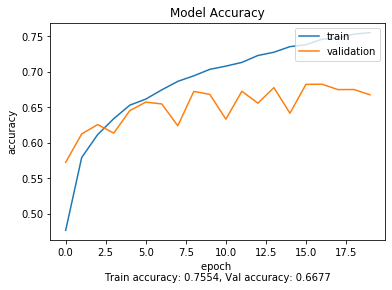

In [0]:
#2 classifier with dropout in dense layer
autoencoder_config=load_config('autoencoder_config_5m_adam_50epochs_3blocks_02dropout.json')
classifier_config= load_config('classifier_config_base.json')
classifier_config['epochs'] = 20
classifier_config['batch_size']= 64
classifier_config['optimizer']= 'adam'
classifier_config['lr'] = 0.001
classifier_config['batch_norm'] = True
classifier_config['dropout'] = True
classifier_config['dropout_value']=0.2
classifier_config['global_pooling'] = 'flatten'
encoder_filename= 'encoder_5m_adam_50epochs_3blocks_02dropout'
classifier_filename= 'classifier_02dropout_dense_5m_adam_50epochs_3blocks_02dropout'
classifier= train_classifier(x_train, x_val, y_train, y_val,
                             autoencoder_config, classifier_config,
                             encoder_filename, classifier_filename)

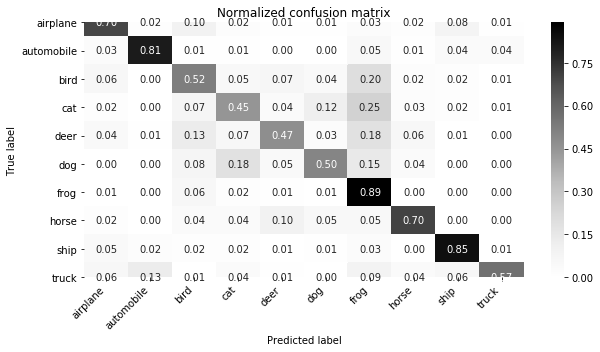


              precision    recall  f1-score   support

    airplane       0.77      0.70      0.73      1090
  automobile       0.87      0.81      0.84      1109
        bird       0.37      0.52      0.43       556
         cat       0.56      0.45      0.50      1126
        deer       0.47      0.47      0.47       519
         dog       0.68      0.50      0.58      1087
        frog       0.53      0.89      0.66      1106
       horse       0.82      0.70      0.76      1111
        ship       0.82      0.85      0.83      1095
       truck       0.81      0.57      0.67       551

    accuracy                           0.67      9350
   macro avg       0.67      0.65      0.65      9350
weighted avg       0.69      0.67      0.67      9350



In [0]:
y_pred= classifier_predict_evaluate(x_val, y_val, classifier, class_names)

/usr/local/lib/python3.6/dist-packages/keras/engine/saving.py:310: UserWarning: No training configuration found in save file: the model was *not* compiled. Compile it manually.
  warnings.warn('No training configuration found in save file: '


Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 32, 32, 3)         0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
batch_normalization_10 (Batc (None, 32, 32, 32)        128       
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
batch_normalization_11 (Batc (None, 32, 32, 32)        128       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
dropout_6 (Dropout)          (None, 16, 16, 32)        0   

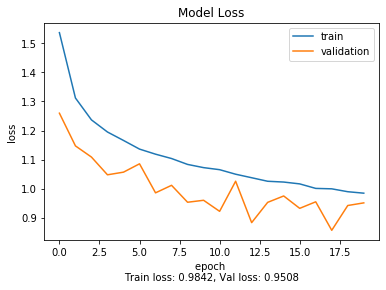

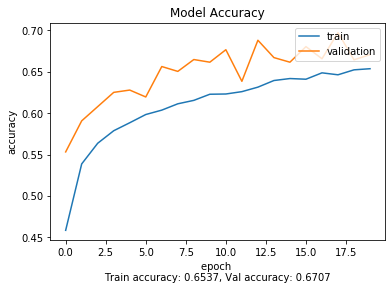

In [0]:
#2 classifier with data augmentation 
autoencoder_config=load_config('autoencoder_config_5m_adam_50epochs_3blocks_02dropout.json')
classifier_config= load_config('classifier_config_base.json')
classifier_config['epochs'] = 20
classifier_config['batch_size']= 64
classifier_config['optimizer']= 'adam'
classifier_config['lr'] = 0.001
classifier_config['batch_norm'] = True
classifier_config['data_augmentation']= True
classifier_config['global_pooling'] = 'flatten'
encoder_filename= 'encoder_5m_adam_50epochs_3blocks_02dropout'
classifier_filename= 'classifier_data_augmentation_5m_adam_50epochs_3blocks_02dropout'
classifier= train_classifier(x_train, x_val, y_train, y_val,
                             autoencoder_config, classifier_config,
                             encoder_filename, classifier_filename)













Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where




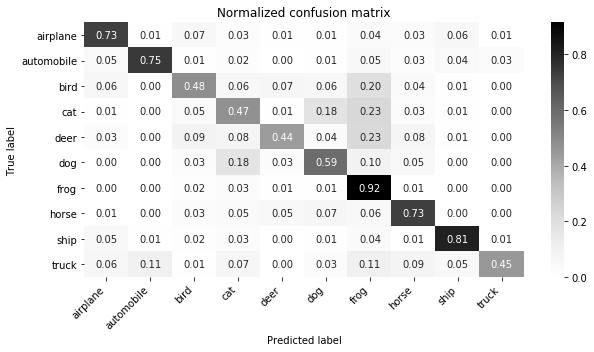


              precision    recall  f1-score   support

    airplane       0.78      0.73      0.76      1090
  automobile       0.91      0.75      0.82      1109
        bird       0.47      0.48      0.48       556
         cat       0.52      0.47      0.50      1126
        deer       0.56      0.44      0.49       519
         dog       0.62      0.59      0.60      1087
        frog       0.54      0.92      0.68      1106
       horse       0.74      0.73      0.74      1111
        ship       0.83      0.81      0.82      1095
       truck       0.83      0.45      0.59       551

    accuracy                           0.67      9350
   macro avg       0.68      0.64      0.65      9350
weighted avg       0.69      0.67      0.67      9350



In [0]:
classifier=load_saved_model('classifier_data_augmentation_5m_adam_50epochs_3blocks_02dropout')
y_pred= classifier_predict_evaluate(x_val, y_val, classifier, class_names)













Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


/usr/local/lib/python3.6/dist-packages/keras/engine/saving.py:310: UserWarning: No training configuration found in save file: the model was *not* compiled. Compile it manually.
  warnings.warn('No training configuration found in save file: '




Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 32, 32, 3)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
batch_normalization_1 (Batch (None, 32, 32, 32)        128       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
batch_normalization_2 (Batch (None, 32, 32, 32)        128       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 16, 16, 32)        0 

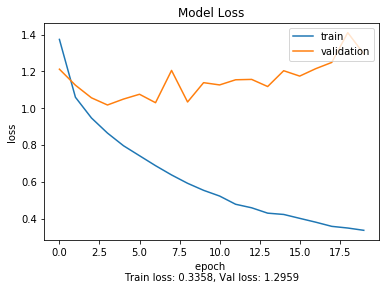

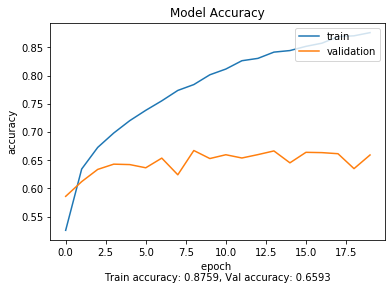

In [0]:
#2 classifier with class weights
autoencoder_config=load_config('autoencoder_config_5m_adam_50epochs_3blocks_02dropout.json')
classifier_config= load_config('classifier_config_base.json')
classifier_config['epochs'] = 20
classifier_config['batch_size']= 64
classifier_config['optimizer']= 'adam'
classifier_config['lr'] = 0.001
classifier_config['batch_norm'] = True
classifier_config['class_weights']= True
classifier_config['global_pooling'] = 'flatten'
encoder_filename= 'encoder_5m_adam_50epochs_3blocks_02dropout'
classifier_filename= 'classifier_class_weights_5m_adam_50epochs_3blocks_02dropout'
classifier= train_classifier(x_train, x_val, y_train, y_val,
                             autoencoder_config, classifier_config,
                             encoder_filename, classifier_filename)

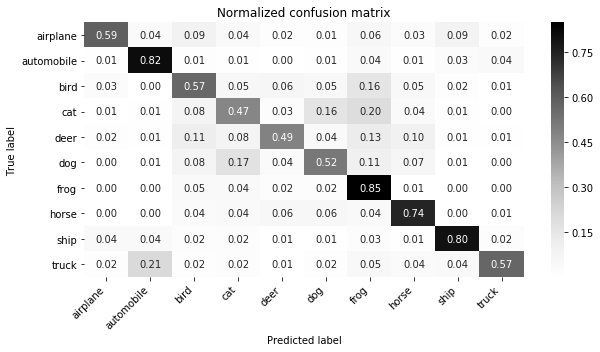


              precision    recall  f1-score   support

    airplane       0.85      0.59      0.70      1090
  automobile       0.79      0.82      0.80      1109
        bird       0.40      0.57      0.47       556
         cat       0.55      0.47      0.51      1126
        deer       0.52      0.49      0.50       519
         dog       0.61      0.52      0.56      1087
        frog       0.57      0.85      0.68      1106
       horse       0.74      0.74      0.74      1111
        ship       0.82      0.80      0.81      1095
       truck       0.73      0.57      0.64       551

    accuracy                           0.66      9350
   macro avg       0.66      0.64      0.64      9350
weighted avg       0.68      0.66      0.66      9350



In [0]:
y_pred= classifier_predict_evaluate(x_val, y_val, classifier, class_names)

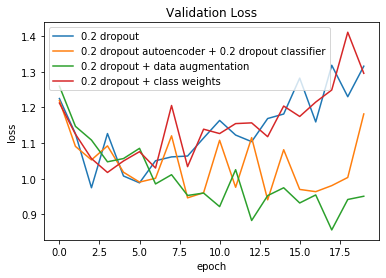

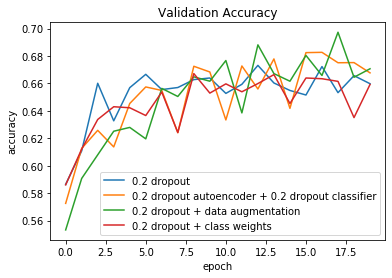

In [0]:
plot_histories(['classifier_5m_adam_50epochs_3blocks_02dropout',
                'classifier_02dropout_dense_5m_adam_50epochs_3blocks_02dropout',
                'classifier_data_augmentation_5m_adam_50epochs_3blocks_02dropout',
                'classifier_class_weights_5m_adam_50epochs_3blocks_02dropout'],
               ['0.2 dropout',
                '0.2 dropout autoencoder + 0.2 dropout classifier',
                '0.2 dropout + data augmentation',
                '0.2 dropout + class weights'],
               'results_focused_02dropout')

/usr/local/lib/python3.6/dist-packages/keras/engine/saving.py:310: UserWarning: No training configuration found in save file: the model was *not* compiled. Compile it manually.
  warnings.warn('No training configuration found in save file: '


Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 32, 32, 3)         0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
batch_normalization_10 (Batc (None, 32, 32, 32)        128       
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
batch_normalization_11 (Batc (None, 32, 32, 32)        128       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 16, 16, 32)        0   

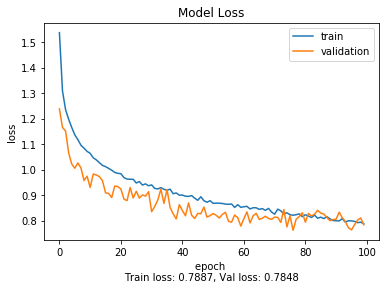

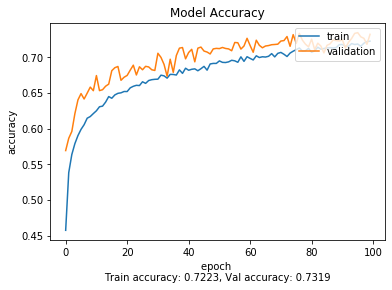

In [0]:
#2 classifier with data augmentation 50 epochs 
autoencoder_config=load_config('autoencoder_config_5m_adam_50epochs_3blocks_02dropout.json')
classifier_config= load_config('classifier_config_base.json')
classifier_config['epochs'] = 100
classifier_config['batch_size']= 64
classifier_config['optimizer']= 'adam'
classifier_config['lr'] = 0.001
classifier_config['batch_norm'] = True
classifier_config['data_augmentation']= True
classifier_config['global_pooling'] = 'flatten'
encoder_filename= 'encoder_5m_adam_50epochs_3blocks_02dropout'
classifier_filename= 'classifier_data_augmentation_100epochs_5m_adam_50epochs_3blocks_02dropout'
classifier= train_classifier(x_train, x_val, y_train, y_val,
                             autoencoder_config, classifier_config,
                             encoder_filename, classifier_filename)













Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where




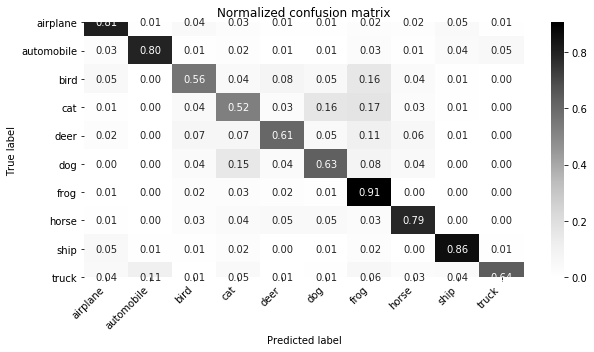


              precision    recall  f1-score   support

    airplane       0.82      0.81      0.82      1090
  automobile       0.91      0.80      0.85      1109
        bird       0.55      0.56      0.56       556
         cat       0.59      0.52      0.56      1126
        deer       0.59      0.61      0.60       519
         dog       0.67      0.63      0.65      1087
        frog       0.63      0.91      0.74      1106
       horse       0.82      0.79      0.81      1111
        ship       0.86      0.86      0.86      1095
       truck       0.81      0.64      0.71       551

    accuracy                           0.73      9350
   macro avg       0.73      0.71      0.71      9350
weighted avg       0.74      0.73      0.73      9350



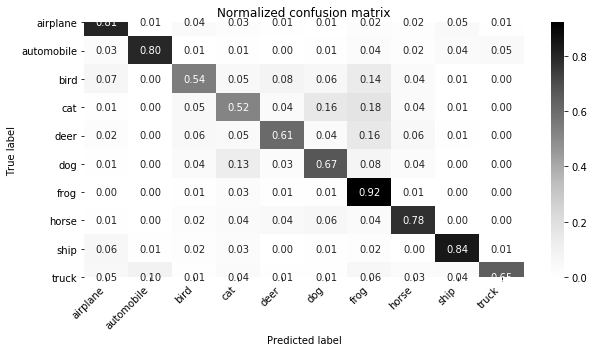


              precision    recall  f1-score   support

    airplane       0.74      0.81      0.78      1000
  automobile       0.86      0.80      0.83      1000
        bird       0.69      0.54      0.60      1000
         cat       0.56      0.52      0.54      1000
        deer       0.72      0.61      0.66      1000
         dog       0.65      0.67      0.66      1000
        frog       0.56      0.92      0.69      1000
       horse       0.76      0.78      0.77      1000
        ship       0.85      0.84      0.84      1000
       truck       0.89      0.65      0.75      1000

    accuracy                           0.71     10000
   macro avg       0.73      0.71      0.71     10000
weighted avg       0.73      0.71      0.71     10000



In [8]:
classifier=load_saved_model('classifier_data_augmentation_100epochs_5m_adam_50epochs_3blocks_02dropout')
y_pred= classifier_predict_evaluate(x_val, y_val, classifier, class_names)
y_pred= classifier_predict_evaluate(x_test, y_test, classifier, class_names)

/usr/local/lib/python3.6/dist-packages/keras/engine/saving.py:310: UserWarning: No training configuration found in save file: the model was *not* compiled. Compile it manually.
  warnings.warn('No training configuration found in save file: '


Model: "model_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         (None, 32, 32, 3)         0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
batch_normalization_19 (Batc (None, 32, 32, 32)        128       
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 32, 32, 32)        9248      
_________________________________________________________________
batch_normalization_20 (Batc (None, 32, 32, 32)        128       
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 16, 16, 64)        1849

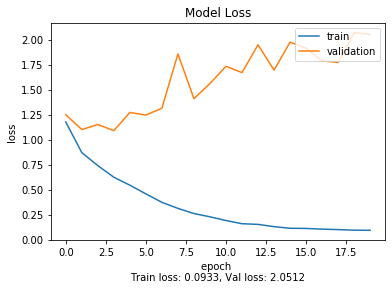

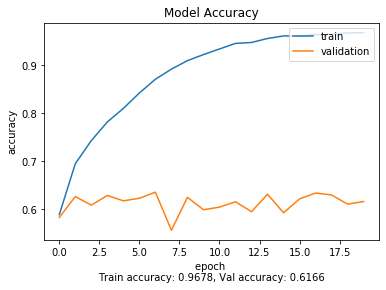

In [0]:
#3
autoencoder_config=load_config('autoencoder_config_5m_adam_50epochs_3blocks_01gaussian_noise_input.json')
classifier_config= load_config('classifier_config_base.json')
classifier_config['epochs'] = 20
classifier_config['batch_size']= 64
classifier_config['optimizer'] = 'adam'
classifier_config['lr'] = 0.001
classifier_config['batch_norm'] = True
classifier_config['global_pooling'] = 'flatten'
encoder_filename= 'encoder_5m_adam_50epochs_3blocks_01gaussian_noise_input'
classifier_filename= 'classifier_5m_adam_50epochs_3blocks_01gaussian_noise_input'
classifier= train_classifier(x_train, x_val, y_train, y_val,
                             autoencoder_config, classifier_config,
                             encoder_filename, classifier_filename)

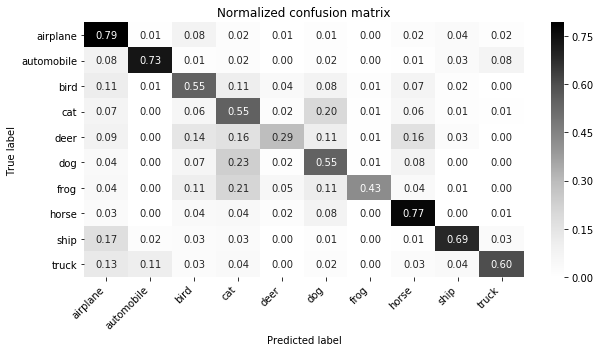


              precision    recall  f1-score   support

    airplane       0.56      0.79      0.66      1090
  automobile       0.88      0.73      0.80      1109
        bird       0.36      0.55      0.44       556
         cat       0.44      0.55      0.49      1126
        deer       0.50      0.29      0.37       519
         dog       0.50      0.55      0.52      1087
        frog       0.93      0.43      0.58      1106
       horse       0.69      0.77      0.73      1111
        ship       0.83      0.69      0.75      1095
       truck       0.67      0.60      0.63       551

    accuracy                           0.62      9350
   macro avg       0.64      0.60      0.60      9350
weighted avg       0.66      0.62      0.62      9350



In [0]:
y_pred= classifier_predict_evaluate(x_val, y_val, classifier, class_names)

/usr/local/lib/python3.6/dist-packages/keras/engine/saving.py:310: UserWarning: No training configuration found in save file: the model was *not* compiled. Compile it manually.
  warnings.warn('No training configuration found in save file: '


Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 32, 32, 3)         0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
batch_normalization_10 (Batc (None, 32, 32, 32)        128       
_________________________________________________________________
gaussian_noise_1 (GaussianNo (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
batch_normalization_11 (Batc (None, 32, 32, 32)        128       
_________________________________________________________________
gaussian_noise_2 (GaussianNo (None, 32, 32, 32)        0   

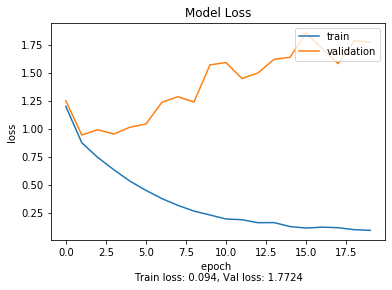

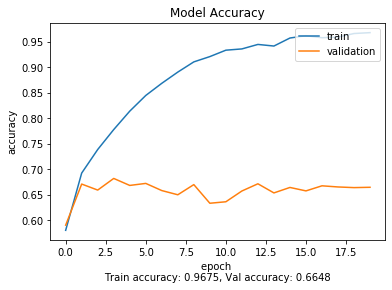

In [0]:
#4
autoencoder_config=load_config('autoencoder_config_5m_adam_50epochs_3blocks_01gaussian_noise_hidden.json')
classifier_config= load_config('classifier_config_base.json')
classifier_config['epochs'] = 20
classifier_config['batch_size']= 64
classifier_config['optimizer'] = 'adam'
classifier_config['lr'] = 0.001
classifier_config['batch_norm'] = True
classifier_config['global_pooling'] = 'flatten'
encoder_filename= 'encoder_5m_adam_50epochs_3blocks_01gaussian_noise_hidden'
classifier_filename= 'classifier_5m_adam_50epochs_3blocks_01gaussian_noise_hidden'
classifier= train_classifier(x_train, x_val, y_train, y_val,
                             autoencoder_config, classifier_config,
                             encoder_filename, classifier_filename)

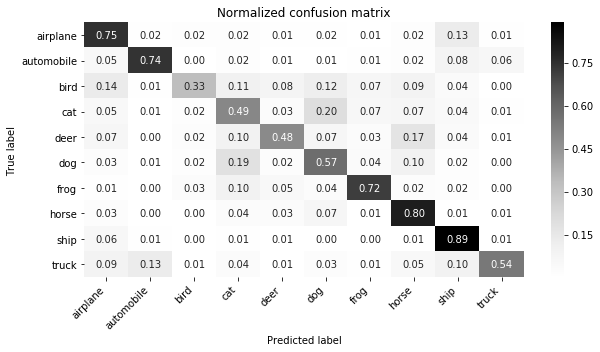


              precision    recall  f1-score   support

    airplane       0.66      0.75      0.70      1090
  automobile       0.86      0.74      0.80      1109
        bird       0.59      0.33      0.42       556
         cat       0.51      0.49      0.50      1126
        deer       0.52      0.48      0.50       519
         dog       0.56      0.57      0.57      1087
        frog       0.80      0.72      0.76      1106
       horse       0.68      0.80      0.73      1111
        ship       0.69      0.89      0.78      1095
       truck       0.71      0.54      0.62       551

    accuracy                           0.66      9350
   macro avg       0.66      0.63      0.64      9350
weighted avg       0.67      0.66      0.66      9350



In [0]:
y_pred= classifier_predict_evaluate(x_val, y_val, classifier, class_names)

/usr/local/lib/python3.6/dist-packages/keras/engine/saving.py:310: UserWarning: No training configuration found in save file: the model was *not* compiled. Compile it manually.
  warnings.warn('No training configuration found in save file: '


Model: "model_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         (None, 32, 32, 3)         0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
batch_normalization_19 (Batc (None, 32, 32, 32)        128       
_________________________________________________________________
gaussian_noise_7 (GaussianNo (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 32, 32, 32)        9248      
_________________________________________________________________
batch_normalization_20 (Batc (None, 32, 32, 32)        128       
_________________________________________________________________
gaussian_noise_8 (GaussianNo (None, 32, 32, 32)        0   

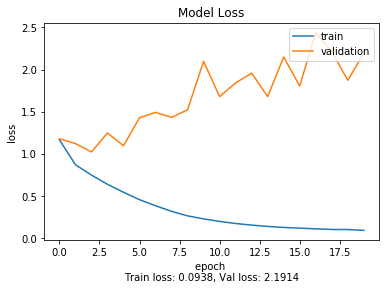

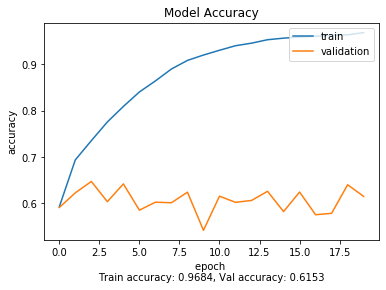

In [0]:
#5
autoencoder_config=load_config('autoencoder_config_5m_adam_50epochs_3blocks_01gaussian_noise_input_hidden.json')
classifier_config= load_config('classifier_config_base.json')
classifier_config['epochs'] = 20
classifier_config['batch_size']= 64
classifier_config['optimizer'] = 'adam'
classifier_config['lr'] = 0.001
classifier_config['batch_norm'] = True
classifier_config['global_pooling'] = 'flatten'
encoder_filename= 'encoder_5m_adam_50epochs_3blocks_01gaussian_noise_input_hidden'
classifier_filename= 'classifier_5m_adam_50epochs_3blocks_01gaussian_noise_input_hidden'
classifier= train_classifier(x_train, x_val, y_train, y_val,
                             autoencoder_config, classifier_config,
                             encoder_filename, classifier_filename)

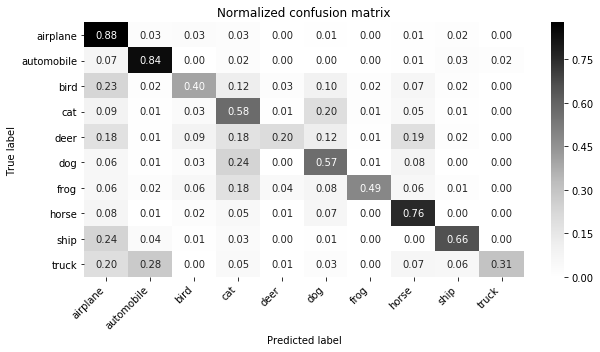


              precision    recall  f1-score   support

    airplane       0.49      0.88      0.63      1090
  automobile       0.76      0.84      0.80      1109
        bird       0.46      0.40      0.43       556
         cat       0.45      0.58      0.50      1126
        deer       0.54      0.20      0.29       519
         dog       0.53      0.57      0.55      1087
        frog       0.92      0.49      0.64      1106
       horse       0.67      0.76      0.71      1111
        ship       0.84      0.66      0.74      1095
       truck       0.86      0.31      0.45       551

    accuracy                           0.62      9350
   macro avg       0.65      0.57      0.57      9350
weighted avg       0.66      0.62      0.61      9350



In [0]:
y_pred= classifier_predict_evaluate(x_val, y_val, classifier, class_names)

/usr/local/lib/python3.6/dist-packages/keras/engine/saving.py:310: UserWarning: No training configuration found in save file: the model was *not* compiled. Compile it manually.
  warnings.warn('No training configuration found in save file: '


Model: "model_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         (None, 32, 32, 3)         0         
_________________________________________________________________
conv2d_22 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
batch_normalization_28 (Batc (None, 32, 32, 32)        128       
_________________________________________________________________
conv2d_23 (Conv2D)           (None, 32, 32, 32)        9248      
_________________________________________________________________
batch_normalization_29 (Batc (None, 32, 32, 32)        128       
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_24 (Conv2D)           (None, 16, 16, 64)        1849

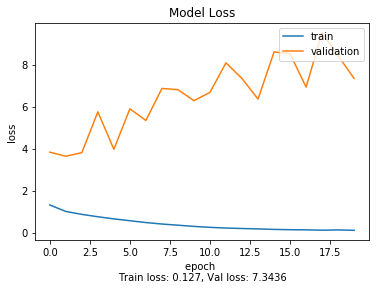

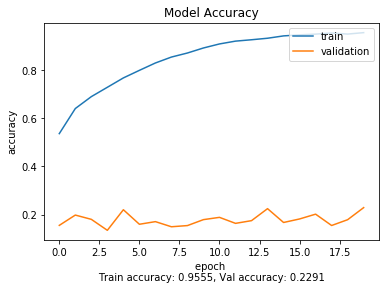

In [0]:
#6
autoencoder_config=load_config('autoencoder_config_5m_adam_50epochs_3blocks_000000001l1activity_regularizer.json')
classifier_config= load_config('classifier_config_base.json')
classifier_config['epochs'] = 20
classifier_config['batch_size']= 64
classifier_config['optimizer'] = 'adam'
classifier_config['lr'] = 0.001
classifier_config['batch_norm'] = True
classifier_config['global_pooling'] = 'flatten'
encoder_filename= 'encoder_5m_adam_50epochs_3blocks_000000001l1activity_regularizer'
classifier_filename= 'classifier_5m_adam_50epochs_3blocks_000000001l1activity_regularizer'
classifier= train_classifier(x_train, x_val, y_train, y_val,
                             autoencoder_config, classifier_config,
                             encoder_filename, classifier_filename)

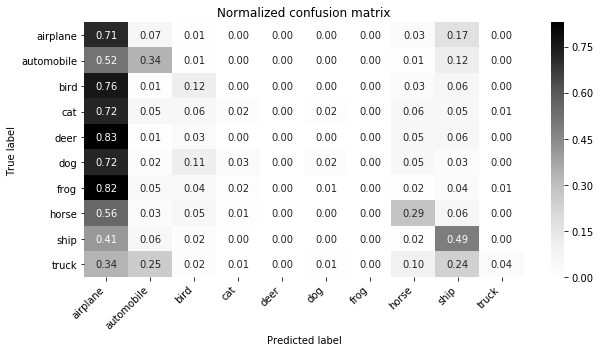


              precision    recall  f1-score   support

    airplane       0.13      0.71      0.22      1090
  automobile       0.45      0.34      0.39      1109
        bird       0.15      0.12      0.13       556
         cat       0.25      0.02      0.04      1126
        deer       0.20      0.00      0.01       519
         dog       0.44      0.02      0.04      1087
        frog       0.00      0.00      0.00      1106
       horse       0.50      0.29      0.36      1111
        ship       0.43      0.49      0.46      1095
       truck       0.42      0.04      0.07       551

    accuracy                           0.23      9350
   macro avg       0.30      0.20      0.17      9350
weighted avg       0.30      0.23      0.19      9350



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [0]:
y_pred= classifier_predict_evaluate(x_val, y_val, classifier, class_names)

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


/usr/local/lib/python3.6/dist-packages/keras/engine/saving.py:310: UserWarning: No training configuration found in save file: the model was *not* compiled. Compile it manually.
  warnings.warn('No training configuration found in save file: '


Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 32, 32, 3)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
batch_normalization_1 (Batch (None, 32, 32, 32)        128       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
batch_normalization_2 (Batch (None, 32, 32, 32)        128       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 16, 16, 32)        0   

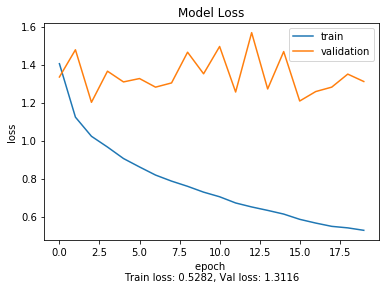

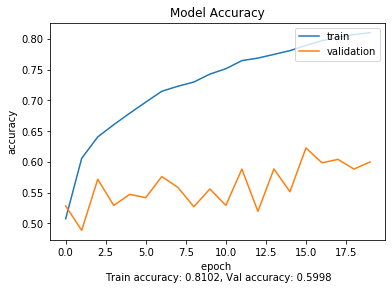

In [0]:
#7
autoencoder_config=load_config('autoencoder_config_5m_adam_50epochs_3blocks_04dropout.json')
classifier_config= load_config('classifier_config_base.json')
classifier_config['epochs'] = 20
classifier_config['batch_size']= 64
classifier_config['optimizer']= 'adam'
classifier_config['lr'] = 0.001
classifier_config['batch_norm'] = True
classifier_config['global_pooling'] = 'flatten'
encoder_filename= 'encoder_5m_adam_50epochs_3blocks_04dropout'
classifier_filename= 'classifier_5m_adam_50epochs_3blocks_04dropout'
classifier= train_classifier(x_train, x_val, y_train, y_val,
                             autoencoder_config, classifier_config,
                             encoder_filename, classifier_filename)

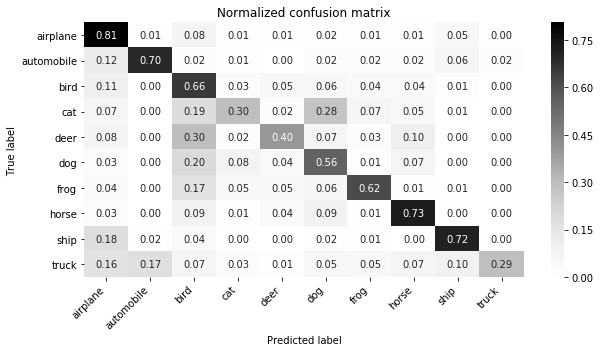


              precision    recall  f1-score   support

    airplane       0.55      0.81      0.66      1090
  automobile       0.84      0.70      0.76      1109
        bird       0.26      0.66      0.37       556
         cat       0.61      0.30      0.40      1126
        deer       0.48      0.40      0.44       519
         dog       0.49      0.56      0.52      1087
        frog       0.76      0.62      0.68      1106
       horse       0.73      0.73      0.73      1111
        ship       0.80      0.72      0.75      1095
       truck       0.83      0.29      0.43       551

    accuracy                           0.60      9350
   macro avg       0.63      0.58      0.57      9350
weighted avg       0.66      0.60      0.60      9350



In [0]:
y_pred= classifier_predict_evaluate(x_val, y_val, classifier, class_names)

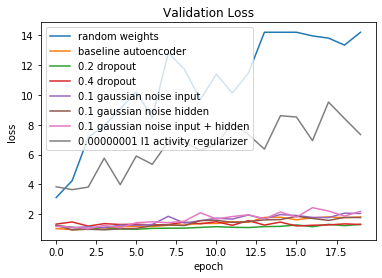

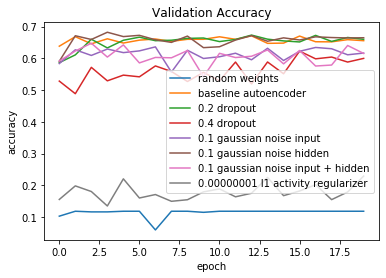

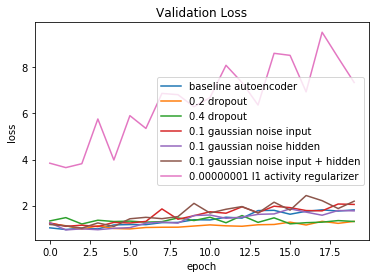

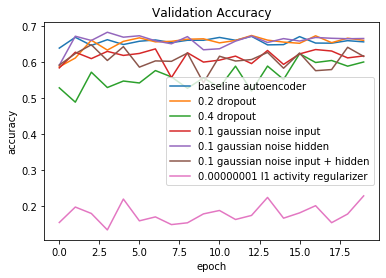

In [0]:
plot_histories(['classifier_5m_adam_50epochs_3blocks',
                'classifier_5m_adam_50epochs_3blocks_02dropout',
                'classifier_5m_adam_50epochs_3blocks_04dropout',
                'classifier_5m_adam_50epochs_3blocks_01gaussian_noise_input',
                'classifier_5m_adam_50epochs_3blocks_01gaussian_noise_hidden',
                'classifier_5m_adam_50epochs_3blocks_01gaussian_noise_input_hidden',
                'classifier_5m_adam_50epochs_3blocks_000000001l1activity_regularizer'],
               ['baseline autoencoder',
                '0.2 dropout',
                '0.4 dropout',
                '0.1 gaussian noise input',
                '0.1 gaussian noise hidden',
                '0.1 gaussian noise input + hidden',
                '0.00000001 l1 activity regularizer'],
               'results_focused')

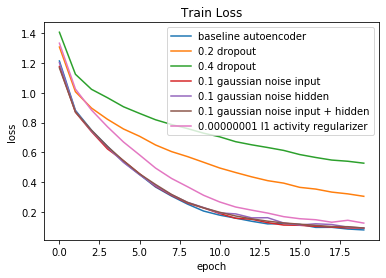

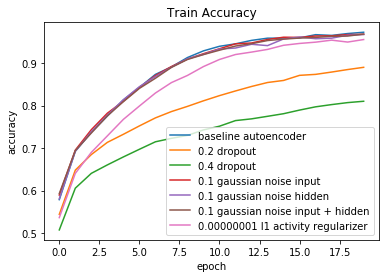

In [0]:
plot_histories(['classifier_5m_adam_50epochs_3blocks',
                'classifier_5m_adam_50epochs_3blocks_02dropout',
                'classifier_5m_adam_50epochs_3blocks_04dropout',
                'classifier_5m_adam_50epochs_3blocks_01gaussian_noise_input',
                'classifier_5m_adam_50epochs_3blocks_01gaussian_noise_hidden',
                'classifier_5m_adam_50epochs_3blocks_01gaussian_noise_input_hidden',
                'classifier_5m_adam_50epochs_3blocks_000000001l1activity_regularizer'],
               ['baseline autoencoder',
                '0.2 dropout',
                '0.4 dropout',
                '0.1 gaussian noise input',
                '0.1 gaussian noise hidden',
                '0.1 gaussian noise input + hidden',
                '0.00000001 l1 activity regularizer'],
               'results',
               train=True)